In [3]:
import pandas as pd

In [4]:
alucar = pd.read_csv('dados/alucar.csv')

In [5]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


## Converter coluna mes para datetime e fazendo grafico

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

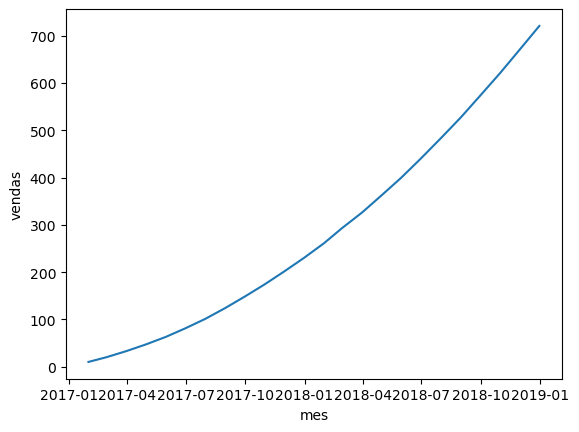

In [9]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

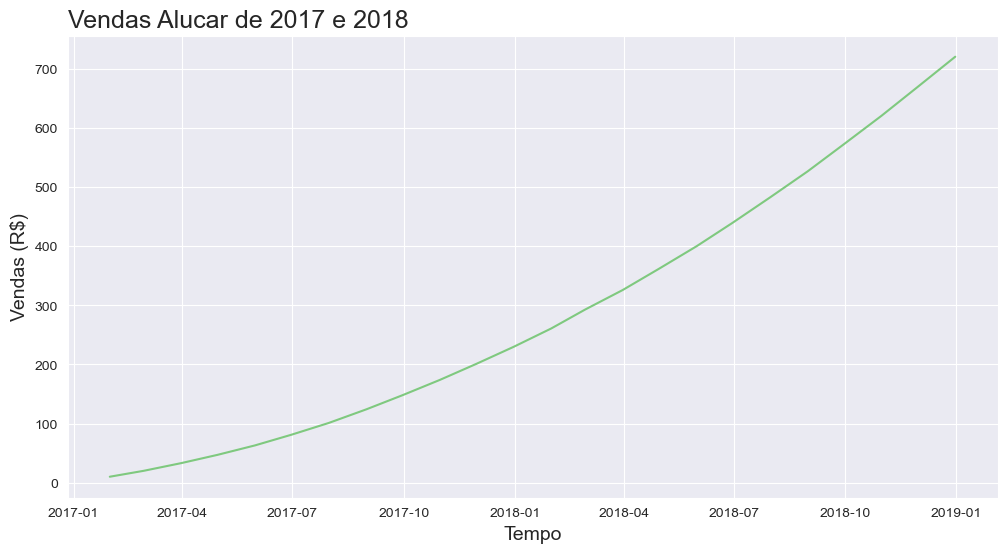

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
grafico = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
grafico.figure.set_size_inches(12,6)
grafico.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
grafico.set_xlabel('Tempo', fontsize = 14)
grafico.set_ylabel('Vendas (R$)', fontsize = 14)
grafico = grafico

In [11]:
alucar['aumento'] = alucar['vendas'].diff()

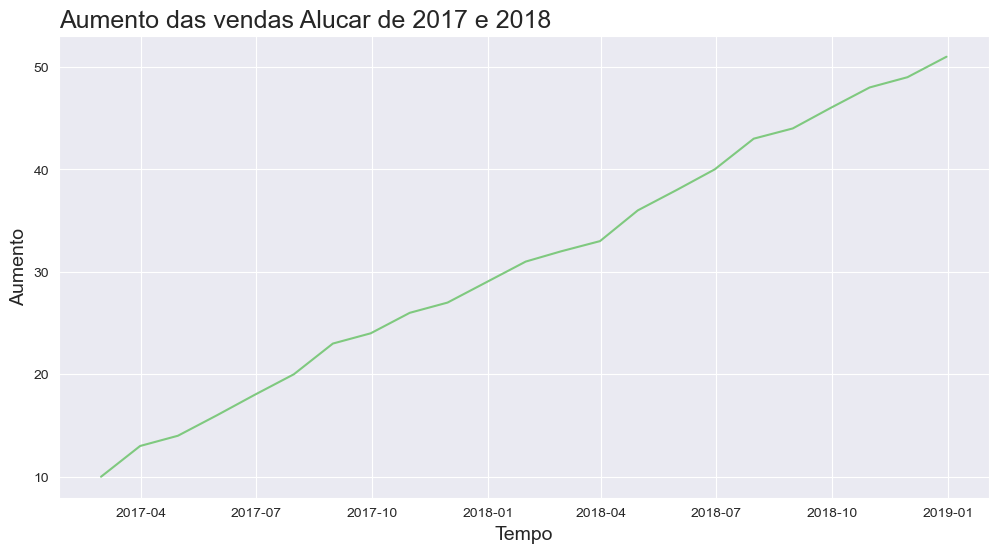

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
grafico = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
grafico.figure.set_size_inches(12,6)
grafico.set_title('Aumento das vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
grafico.set_xlabel('Tempo', fontsize = 14)
grafico.set_ylabel('Aumento', fontsize = 14)
grafico = grafico

## Funcao para graficos

In [13]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico = sns.lineplot(x = x, y = y, data = dataset)
    grafico.figure.set_size_inches(12,6)
    grafico.set_title(titulo, loc = 'left', fontsize = 18)
    grafico.set_xlabel(labelx, fontsize = 14)
    grafico.set_ylabel(labely, fontsize = 14)
    grafico = grafico

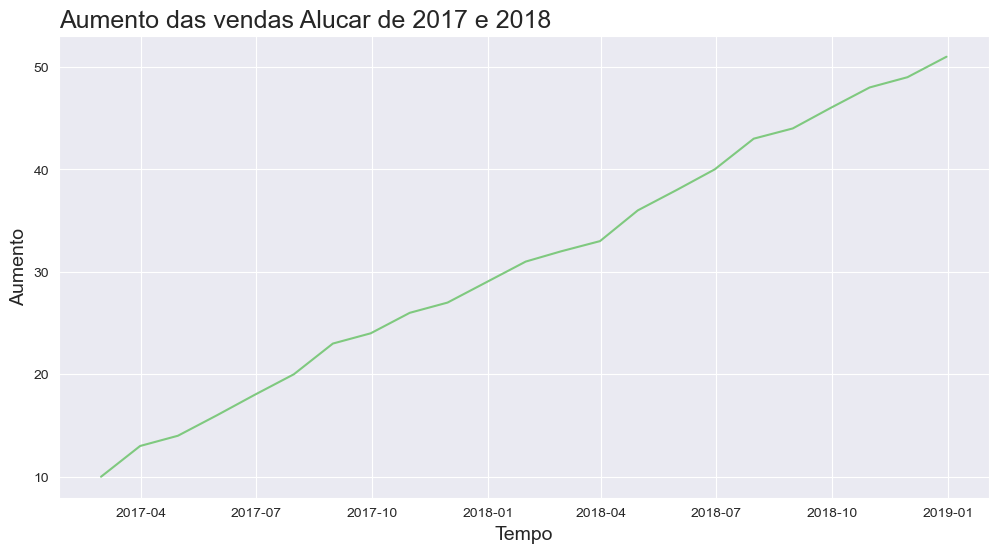

In [14]:
plotar('Aumento das vendas Alucar de 2017 e 2018',
      'Tempo',
      'Aumento',
      'mes',
      'aumento',
      alucar)

In [15]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


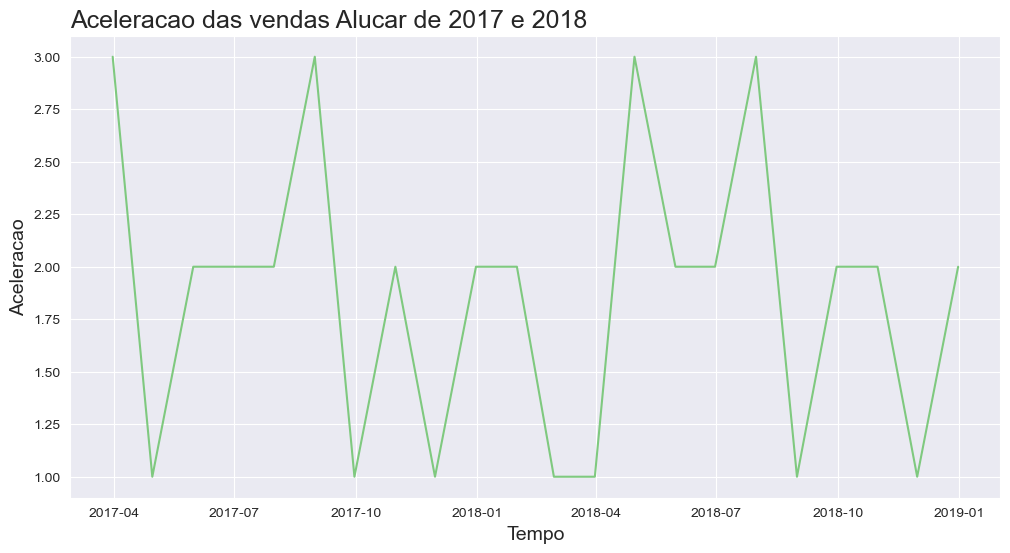

In [16]:
plotar('Aceleracao das vendas Alucar de 2017 e 2018', 
       'Tempo', 
       'Aceleracao', 
       'mes', 
       'aceleracao',
       alucar)

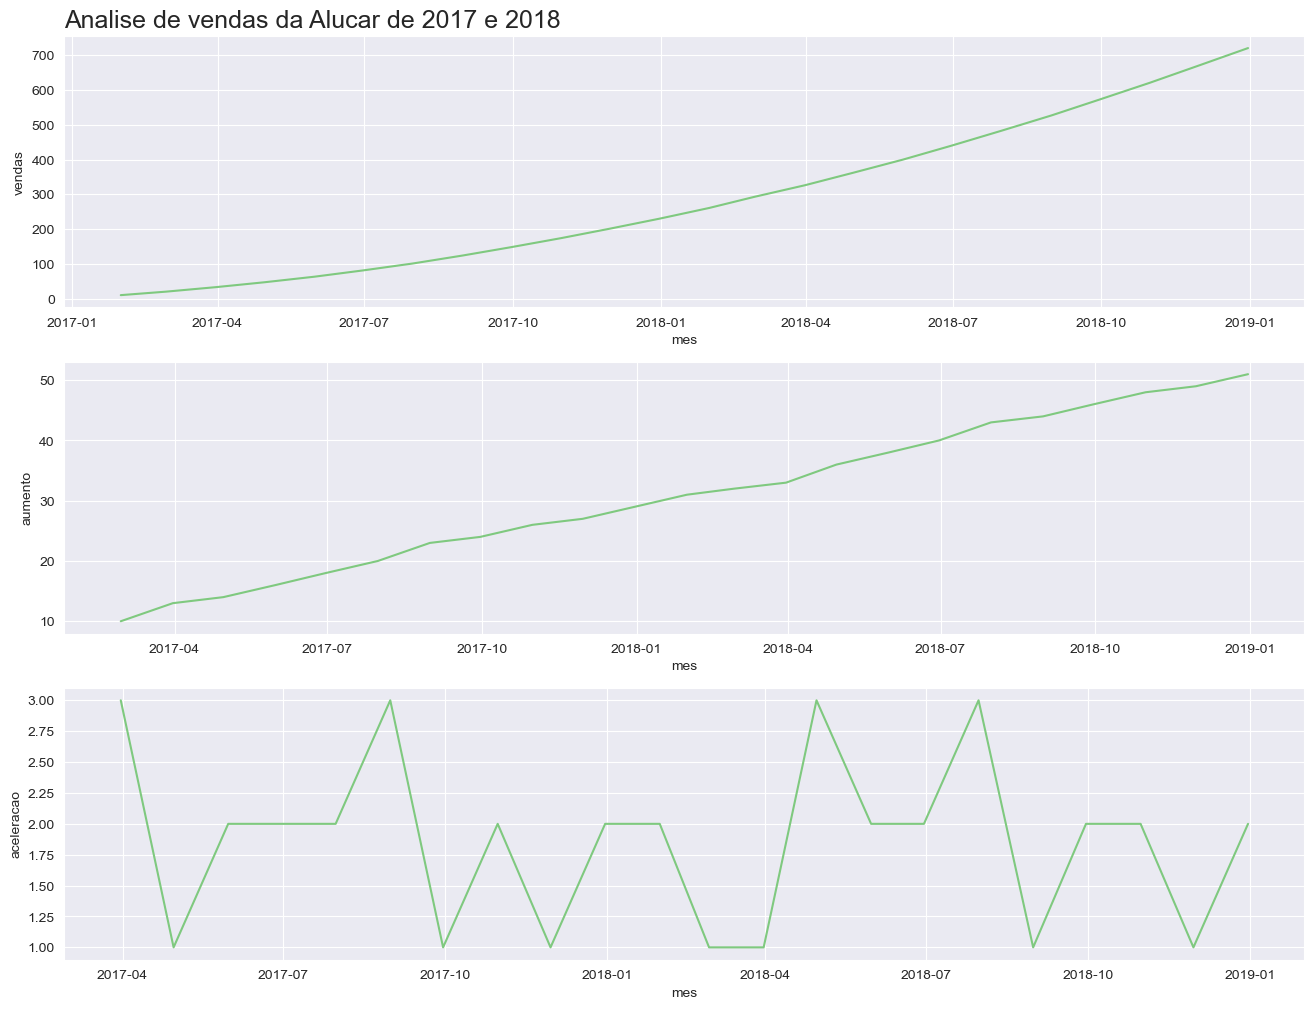

In [17]:
plt.figure(figsize = (16, 12))
grafico = plt.subplot(3, 1, 1)
grafico.set_title('Analise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
grafico = plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
grafico = plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
grafico = grafico

In [18]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    grafico = plt.subplot(3, 1, 1)
    grafico.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    grafico = plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    grafico = plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    grafico = grafico

In [19]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

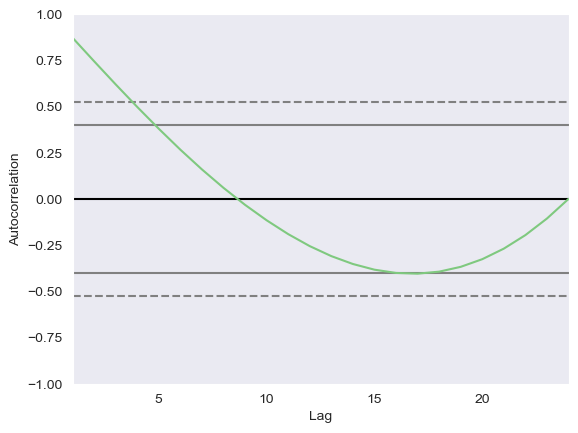

In [20]:
autocorrelation_plot(alucar['vendas'])

# Analisando newsletter

In [22]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')

In [23]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [24]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [25]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


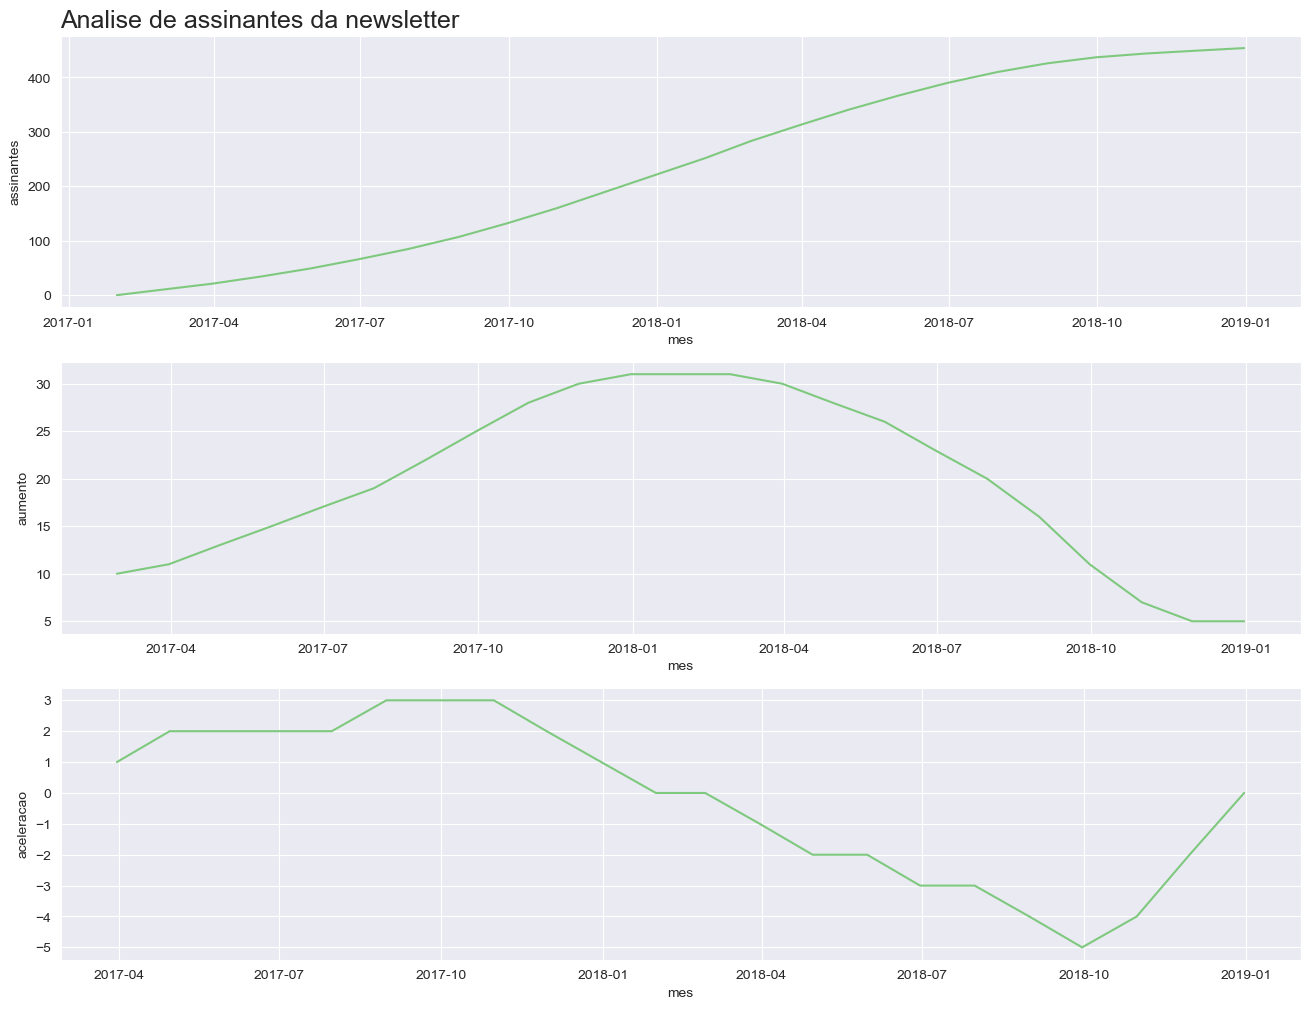

In [26]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes da newsletter')

# Analisando sazonalidade

In [28]:
chocolura = pd.read_csv('dados/chocolura.csv')

In [30]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [32]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [33]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [34]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64